# Experiment4

## 'MADDPG' vs 'DDPG'
Let us check how the training method changes the agents' behavior.

### exp 4-1-1
- prey: 'DDPG'
- predator: 'MADDPG'

simple_tag__2018-03-19_20-21-21


### exp 4-1-2
- prey: 'MADDPG'
- predator: 'DDPG'

simple_tag__2018-03-20_01-48-56

### exp 4-2-1
- prey: 'DDPG'
- predator: 'MADDPG'

- 'simple_tag__2018-03-20_14-44-44_seed10'
- 'simple_tag__2018-03-20_14-44-45_seed20'
- 'simple_tag__2018-03-20_14-44-47_seed30'

### exp 4-2-2
- prey: 'MADDPG'
- predator: 'DDPG'

- 'simple_tag__2018-03-20_14-44-50_seed10'
- 'simple_tag__2018-03-20_14-44-51_seed20'
- 'simple_tag__2018-03-20_14-44-54_seed30'


## Summary
I confirmed that the training method changed the agents' act (see below for details).

In [1]:
%matplotlib inline
import os
import os.path as osp
import re
import glob
from IPython.display import HTML
from IPython.display import display

exp_dir = '../exp_results/exp4_180319'

def play_linked_video(each_exp_dir, n_epi, width=500, height=300):
    link_dir = osp.join('./videos', osp.basename(each_exp_dir))
    if osp.lexists(link_dir):
        os.remove(link_dir)
    os.symlink(osp.abspath(each_exp_dir), link_dir)
    fn_video = osp.join(link_dir, 'videos/video-%d.mp4' % n_epi)
    return _play_video(fn_video, width, height)

def _play_video(fn_video, width, height):
    print(fn_video)
    return HTML("""
    <video width="%d" height="%d" controls>
      <source src="%s" type="video/mp4">
    </video>""" % (width, height, fn_video))
    
def get_exp_dir(exp_dir, scenario):
    for fn in glob.glob(osp.join(exp_dir, '*')):
        if re.search(scenario + '__', fn):
            return fn

def plot_each_lc2(each_exp_dir):
    fn_lcs = ['rewards.csv', 'rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    for i, fn_rew in enumerate(fn_lcs):
        fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rew)
        df_lc = pd.read_csv(fn_lc, index_col=False)
        df_lc.columns = [coln.strip() for coln in df_lc.columns]
        if i == 0:
            df_lc['step_per_epi'] = df_lc[['step']].diff().values / df_lc[['episode']].diff().values
            df_lc.plot(x='episode', y='step_per_epi', style='-o', fontsize=12, 
                               ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)
        else:
            del df_lc['step']
            df_lc.plot(x='episode', style='-o', fontsize=12, ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)
    #     break


### exp 4-1-1
- prey: 'DDPG'
- predator: 'MADDPG'

#### Results
From the video, it is difficut to find the difference from the case of prey  
with "MADDPG'. But the converged reward of the prey is different: 
- ~ -170 @ exp4-1-4
- ~ -220 @ exp2-2-2

Interestingly, thre reward of the prey with 'DDPG' is more than that with 'MADDPG'.  
Given that 'MADDPG' have more info, I expected 'MADDPG' model is better.  
I'm not sure why this happens, but this might be because more info prevents the prey  
from a quick change direction; the small info. (= obs.) could change rapidly at every step,   
so the prey could change its act rapidly too.

None

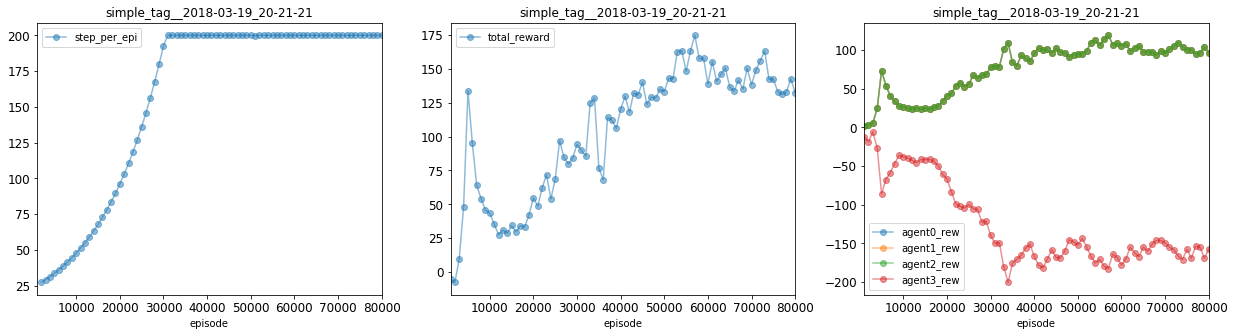

epi = 20000
./videos/simple_tag__2018-03-19_20-21-21/videos/video-20000.mp4


epi = 30000
./videos/simple_tag__2018-03-19_20-21-21/videos/video-30000.mp4


epi = 40000
./videos/simple_tag__2018-03-19_20-21-21/videos/video-40000.mp4


epi = 50000
./videos/simple_tag__2018-03-19_20-21-21/videos/video-50000.mp4


epi = 80000
./videos/simple_tag__2018-03-19_20-21-21/videos/video-80000.mp4


In [2]:
each_exp_dir= 'simple_tag__2018-03-19_20-21-21'
epis = [20000, 30000, 40000, 50000, 80000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    print('epi = %d' % epi)
    display(play_linked_video(each_exp_dir, n_epi = epi))

### 4-1-2
- prey: 'MADDPG'
- predator: 'DDPG'

#### Results
The epi-80000 model shows that predators act more 'selfish': each predator chase for the prey by itself.  
Compared with the exp 2-2-2, you can see the difference; the reward looks slightly better than that of exp 2-2-2.

None

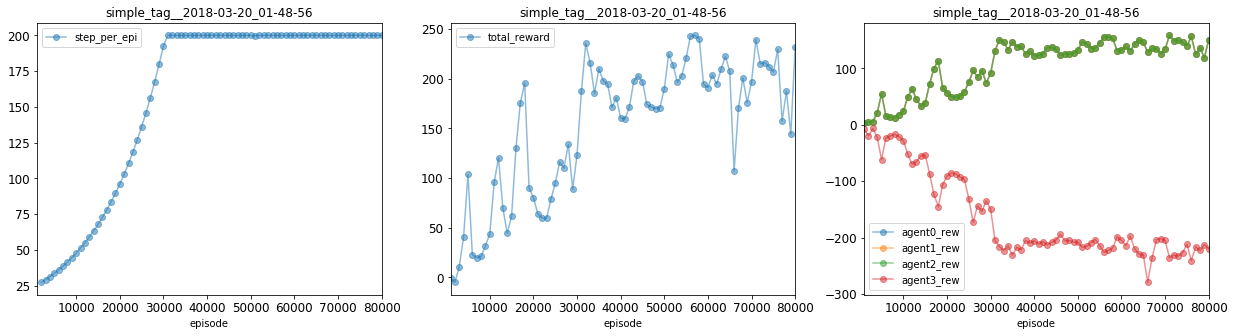

epi = 20000
./videos/simple_tag__2018-03-20_01-48-56/videos/video-20000.mp4


epi = 30000
./videos/simple_tag__2018-03-20_01-48-56/videos/video-30000.mp4


epi = 40000
./videos/simple_tag__2018-03-20_01-48-56/videos/video-40000.mp4


epi = 50000
./videos/simple_tag__2018-03-20_01-48-56/videos/video-50000.mp4


epi = 80000
./videos/simple_tag__2018-03-20_01-48-56/videos/video-80000.mp4


In [3]:
each_exp_dir= 'simple_tag__2018-03-20_01-48-56'
epis = [20000, 30000, 40000, 50000, 80000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    print('epi = %d' % epi)
    display(play_linked_video(each_exp_dir, n_epi = epi))

## exp 4-2
To check whether the 4-1 results are just coincidence, we train three more models  
with difference random seeds.

The obtained resutls have the similar tendency to the 4-1 results; the 4-1 discussion seems valid.

### 4-2-1
Same as 4-1-1. Only random seeds are changd.  
The all three results are almost the same as 4-1-1.

In [4]:
def plot_each_lc2_multi(each_exp_dir, axes):
    fn_lcs = ['rewards.csv', 'rewards.csv', 'agents_rewards.csv']
    
#     fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    for i, fn_rew in enumerate(fn_lcs):
        fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rew)
        df_lc = pd.read_csv(fn_lc, index_col=False)
        df_lc.columns = [coln.strip() for coln in df_lc.columns]
        if i == 0:
            df_lc['step_per_epi'] = df_lc[['step']].diff().values / df_lc[['episode']].diff().values
            df_lc.plot(x='episode', y='step_per_epi', style='-o', fontsize=12, 
                               ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)
        else:
            del df_lc['step']
            df_lc.plot(x='episode', style='-o', fontsize=12, ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5, legend=False)


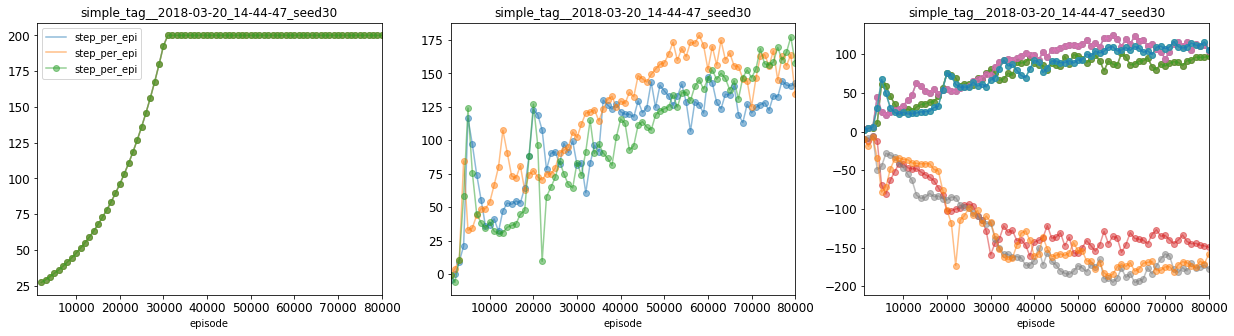

In [5]:
each_exp_dirs= ['simple_tag__2018-03-20_14-44-44_seed10',
                              'simple_tag__2018-03-20_14-44-45_seed20',
                              'simple_tag__2018-03-20_14-44-47_seed30']
fig, axes = plt.subplots(1, 3, figsize=(21, 5))
for each_exp_dir in each_exp_dirs:
    each_exp_dir = osp.join(exp_dir, each_exp_dir)
    plot_each_lc2_multi(each_exp_dir, axes)

### 4-2-2
Same as 4-1-2. Only random seeds are changd.  
One of three results is different from the otheres. I checked the model  
and found that the model is not properly trained (one of three predators was not trained).  

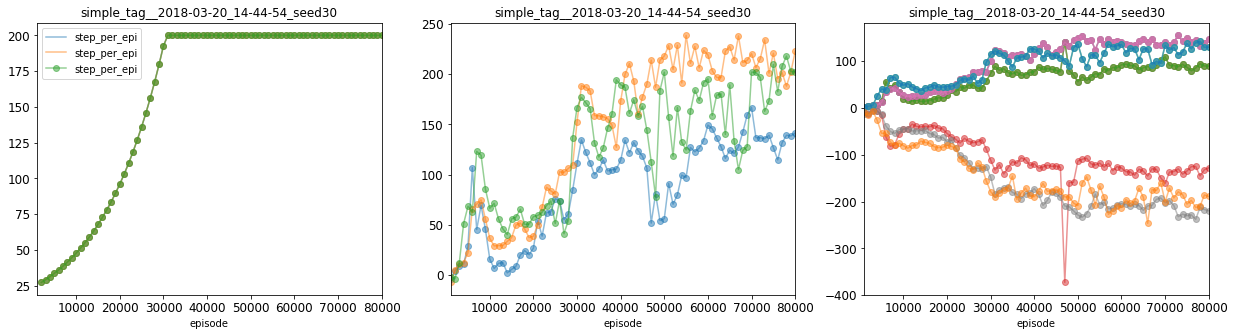

In [6]:
# ひとつだけ外れているのは、2/3しか学ばなかったから。
# ddpgの方が不安定な可能性はある。これは原理的にもconsistent
each_exp_dirs= ['simple_tag__2018-03-20_14-44-50_seed10',
                               'simple_tag__2018-03-20_14-44-51_seed20',
                               'simple_tag__2018-03-20_14-44-54_seed30']
fig, axes = plt.subplots(1, 3, figsize=(21, 5))
for each_exp_dir in each_exp_dirs:
    each_exp_dir = osp.join(exp_dir, each_exp_dir)
    plot_each_lc2_multi(each_exp_dir, axes)